In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
imdb_data = pd.read_csv("./data/imdb_top_movies.csv")

In [3]:
# Quick view of the data
imdb_data.head() 

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# Shape of the data
imdb_data.shape

(1000, 16)

In [5]:
# Check number of null values in each column
imdb_data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
# Rename column value
imdb_data = imdb_data.rename(columns={"Series_Title": "Movies_Title"})

In [10]:
imdb_data.head(1)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"


In [11]:
print(imdb_data["Gross"])

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object


In [14]:
imdb_data["Gross"] = imdb_data["Gross"].str.replace(',', '')
imdb_data["Gross"].head(1)

0    28341469
Name: Gross, dtype: object

In [19]:
imdb_data.dtypes

Poster_Link       object
Movies_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [21]:
# Change data type of gross column and also update null value with 0
imdb_data["Gross"] = imdb_data["Gross"].astype('float64')
imdb_data["Gross"].dtypes

dtype('float64')

In [25]:
imdb_data["Gross"] = imdb_data["Gross"].replace(np.nan, 0)
imdb_data["Gross"].head()

0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64

In [28]:
# Find correlation
imdb_data.corr(numeric_only=True) # specify numeric_only to True because corr() works only with numbers 

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


array([[<Axes: title={'center': 'IMDB_Rating'}>,
        <Axes: title={'center': 'Meta_score'}>],
       [<Axes: title={'center': 'No_of_Votes'}>,
        <Axes: title={'center': 'Gross'}>]], dtype=object)

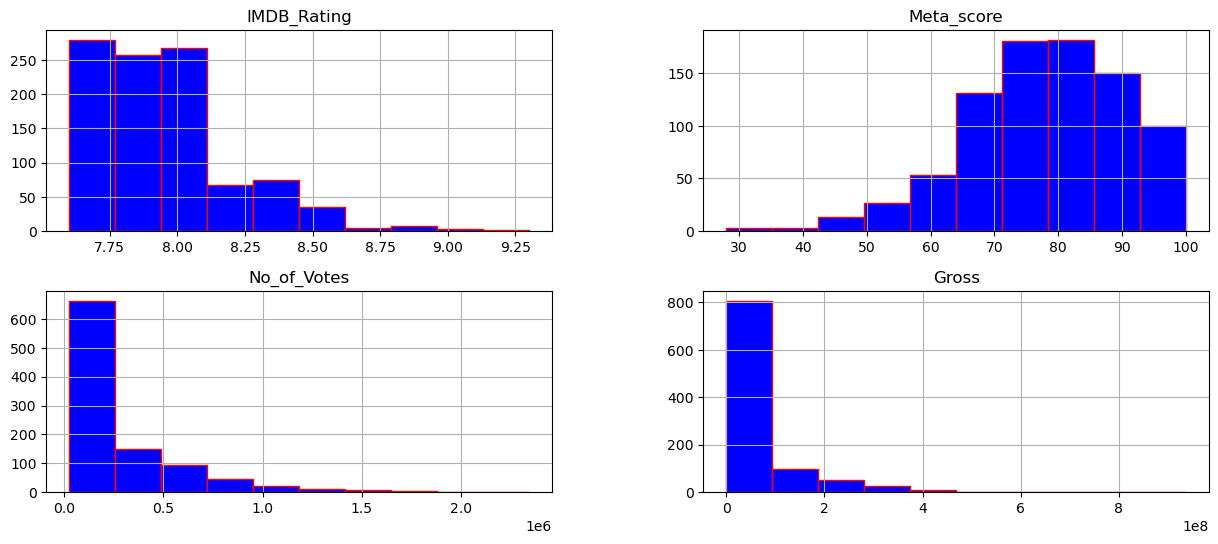

In [31]:
numberical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
imdb_data[numberical_attributes].hist(figsize=(15, 6), color='blue', edgecolor='red', layout=(2,2))

In [36]:
imdb_data.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,843.000000,1.000000e+03,1.000000e+03
mean,7.949300,77.971530,2.736929e+05,5.653688e+07
std,0.275491,12.376099,3.273727e+05,1.032382e+08
min,7.600000,28.000000,2.508800e+04,0.000000e+00
25%,7.700000,70.000000,5.552625e+04,4.457098e+05
50%,7.900000,79.000000,1.385485e+05,1.070275e+07
75%,8.100000,87.000000,3.741612e+05,6.153989e+07
max,9.300000,100.000000,2.343110e+06,9.366622e+08


In [45]:
top_voted = imdb_data.sort_values(["No_of_Votes"], ascending=False)
top_voted["No_of_Votes"].head()

0    2343110
2    2303232
8    2067042
9    1854740
6    1826188
Name: No_of_Votes, dtype: int64

In [79]:
def diagram_plot(title = None, x_label_ = None, ylabel_ = None, x_data_ = None, y_data_=None, color=None):
    fig, axs = plt.subplots(figsize=(15, 5))
    plt.xlabel(xlabel=x_label_, weight="bold")
    plt.ylabel(ylabel=ylabel_, weight="bold")
    bar_plot = sns.barplot(x=x_data_, y=y_data_, palette="husl", hue=y_data_, legend=False)
    bar_plot.set_title(title, weight = "bold")

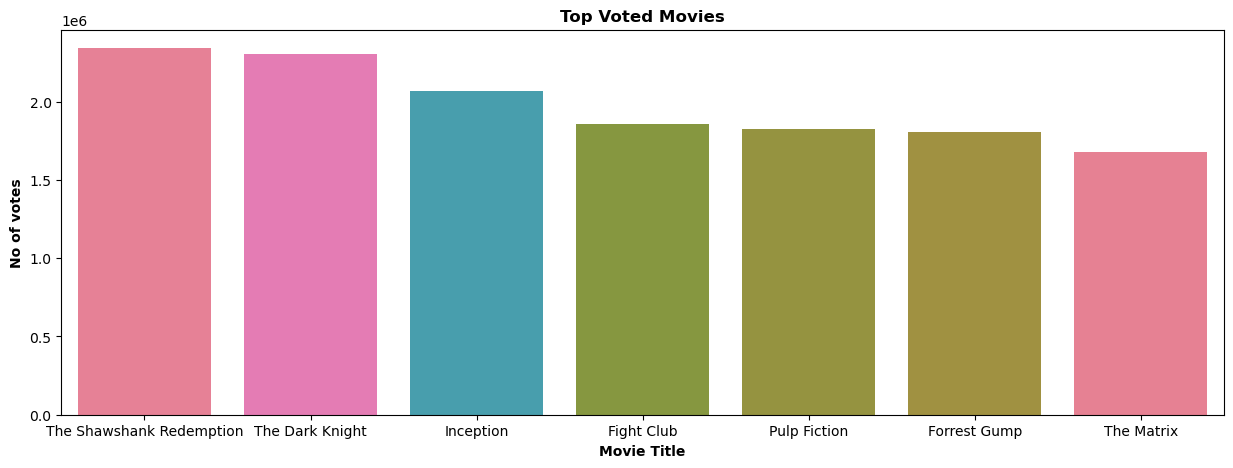

In [82]:
# Top rated movies based on Viewers Vote
diagram_plot(title = "Top Voted Movies", x_label_ = "Movie Title", ylabel_ = "No of votes", x_data_ = top_voted["Movies_Title"][:7], y_data_ = top_voted["No_of_Votes"][:7], color = "hls")


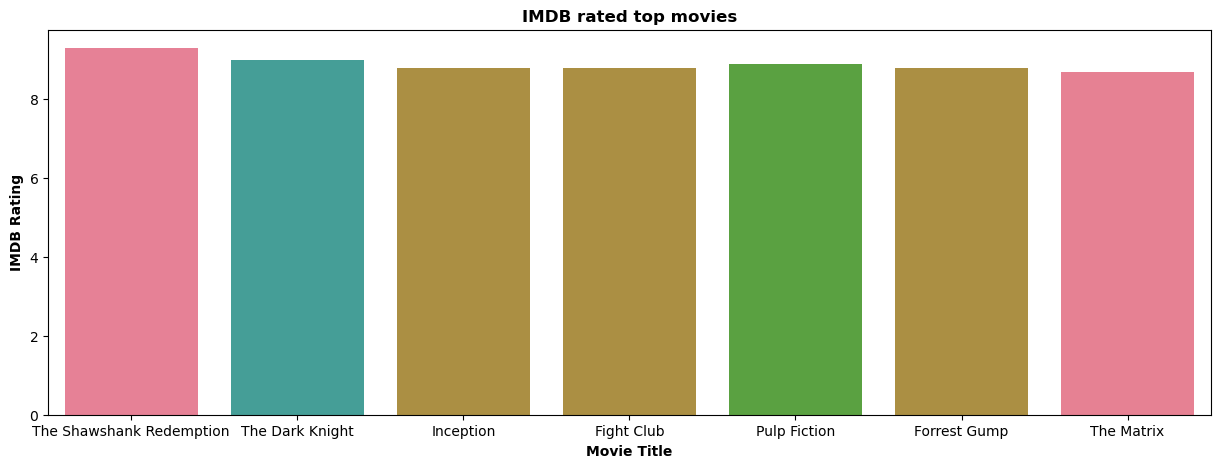

In [84]:
# Top rated movies based on IMDB Rating
diagram_plot(title = "IMDB rated top movies", x_label_ = "Movie Title", ylabel_ = "IMDB Rating", x_data_ = top_voted["Movies_Title"][:7], y_data_ = top_voted["IMDB_Rating"][:7], color = "hls")

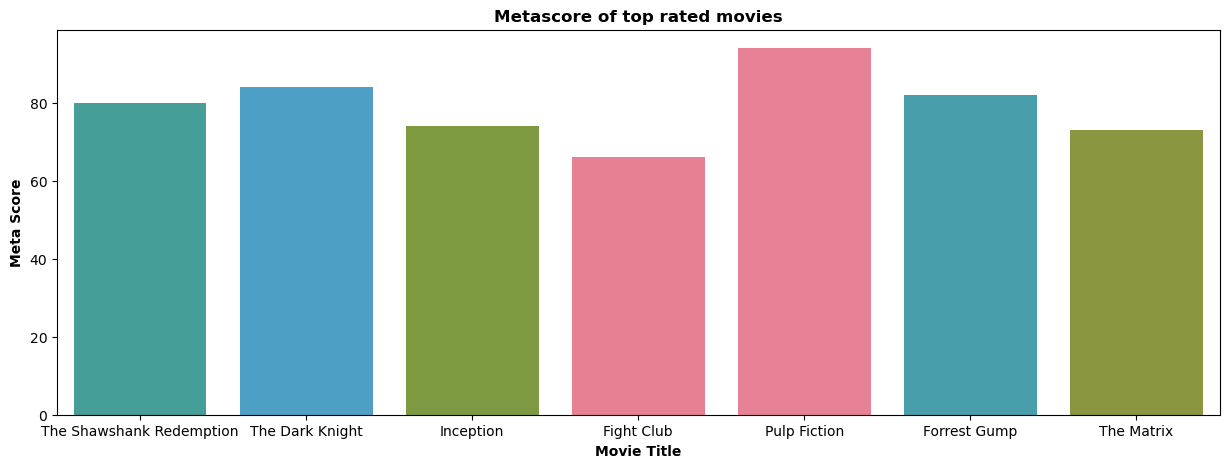

In [85]:
# Top rated movies based on IMDB Rating
diagram_plot(title = "Metascore of top rated movies", x_label_ = "Movie Title", ylabel_ = "Meta Score", x_data_ = top_voted["Movies_Title"][:7], y_data_ = top_voted["Meta_score"][:7], color = "hls")

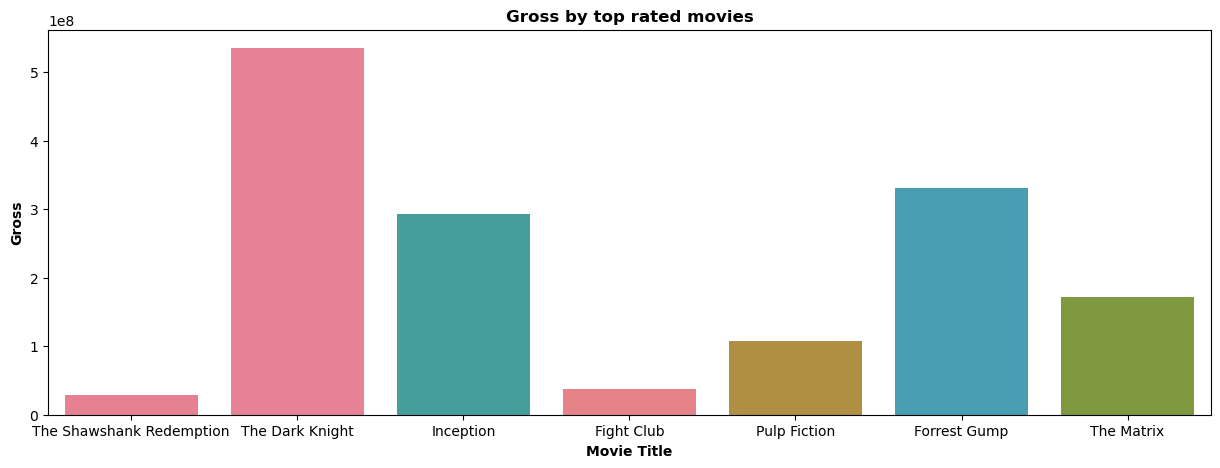

In [81]:
# Top rated movies based on Gross Income
diagram_plot(title = "Gross by top rated movies", x_label_ = "Movie Title", ylabel_ = "Gross", x_data_ = top_voted["Movies_Title"][:7], y_data_ = top_voted["Gross"][:7], color = "husl")

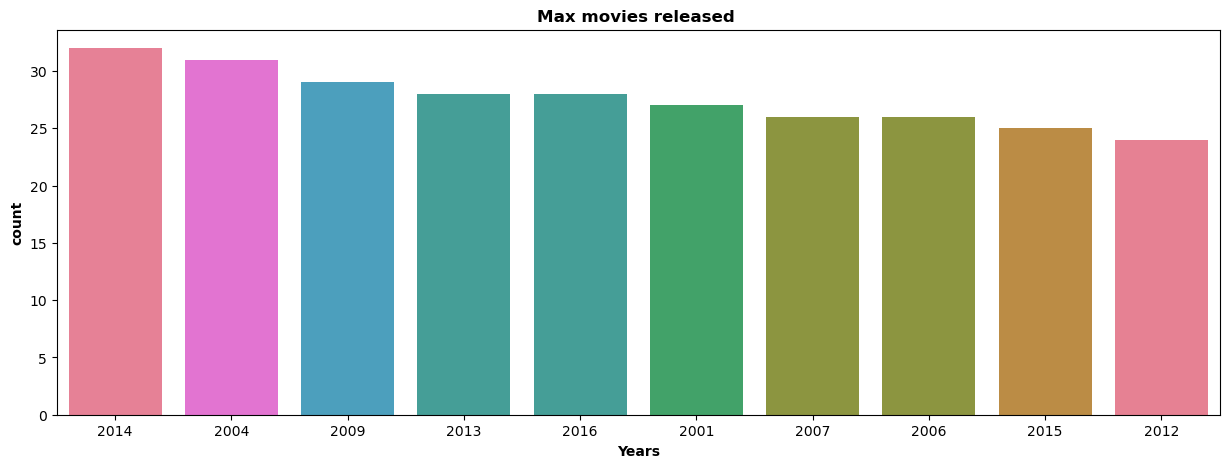

In [88]:
# Maximum movie released
diagram_plot(title = "Max movies released ", x_label_ = "Years", x_data_ = imdb_data["Released_Year"].value_counts()[:10].index, y_data_ = imdb_data["Released_Year"].value_counts()[:10], color = "husl")

Text(0.5, 0, 'Director')

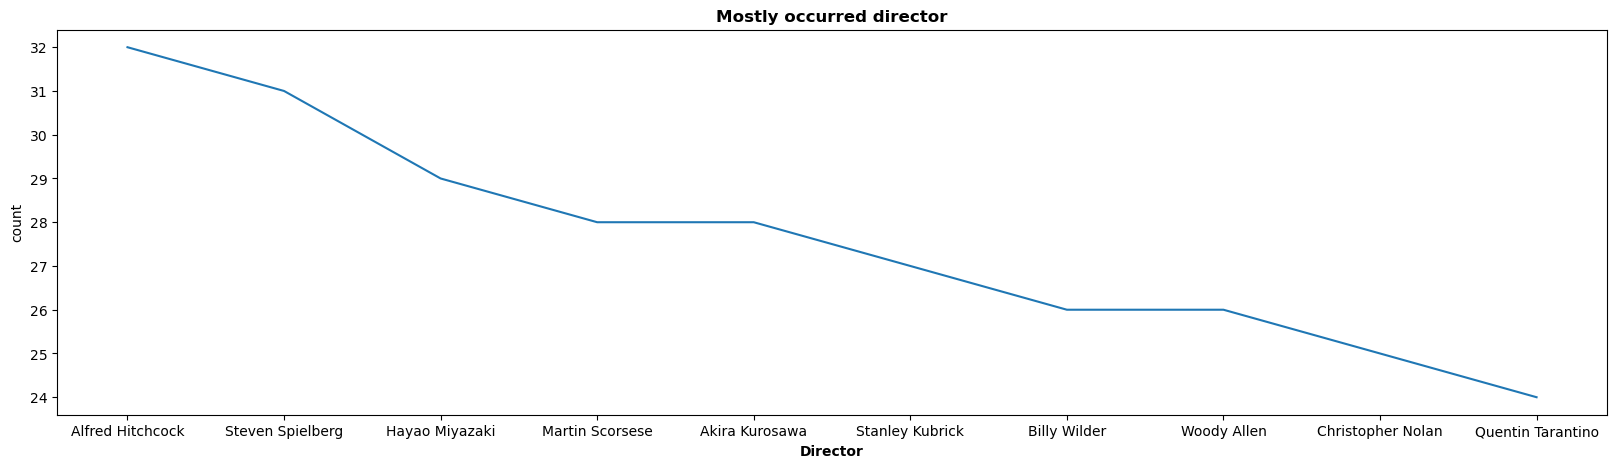

In [97]:
# Most occurred directors by lineplot

imdb_data["Director"].value_counts()

figsize = plt.subplots(figsize=(20, 5))
line = sns.lineplot(x=imdb_data["Director"].value_counts()[:10].index, y=imdb_data["Released_Year"].value_counts()[:10])
line.set_title("Mostly occurred director", weight="bold")
line.set_xlabel("Director", weight="bold")

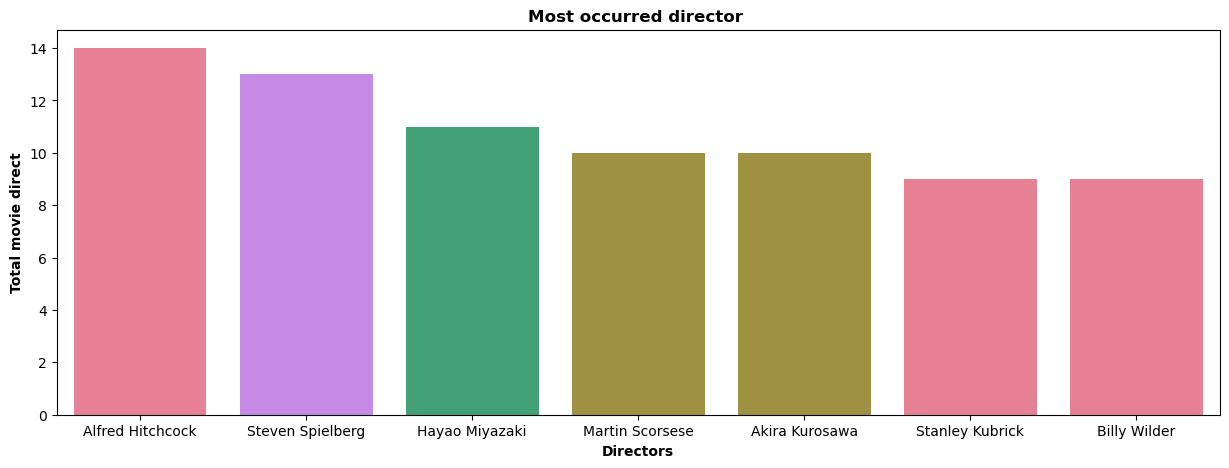

In [113]:
# Most occurred director by BarPlot
diagram_plot(title = "Most occurred director ", x_label_ = "Directors", ylabel_ = "Total movie direct", x_data_ = imdb_data["Director"].value_counts()[:7].index, y_data_ = imdb_data["Director"].value_counts()[:7], color = "viridis")

In [122]:
# Gross income by top 10 director movies
#diagram_plot(title = "Directors ", x_label_ = "Mostly Occurred",  x_data_ = imdb_data["Director"].value_counts()[:10].index, y_data_ = imdb_data["Gross"].value_counts().loc[:10])

In [8]:
pd.qcut(imdb_data["Meta_score"], q=4, labels=["aweful", "bad", "average", "good"]).head()

0    average
1       good
2    average
3       good
4       good
Name: Meta_score, dtype: category
Categories (4, object): ['aweful' < 'bad' < 'average' < 'good']